In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mapping import map_str_values
from mpl_toolkits.mplot3d import Axes3D

In [27]:
X_train = pd.read_csv("data/train_values.csv")
Y_train = pd.read_csv("data/train_labels.csv")

In [28]:
mapped_X = map_str_values(X_train).iloc[:, 1:]


In [29]:
color_map = {
    1:"red",
    2:"green",
    3:"blue"
}

colors = Y_train["damage_grade"].map(color_map)
Y_train["color"] = colors
Y_train


,building_id,damage_grade,color
0,802906,3,blue
1,28830,2,green
2,94947,3,blue
3,590882,2,green
4,201944,3,blue
...,...,...,...
260596,688636,2,green
260597,669485,3,blue
260598,602512,3,blue
260599,151409,2,green


In [30]:
pca = PCA(n_components=3, random_state=192)
X0 = pca.fit_transform(mapped_X)
X0

array([[ 5.94010069e+03, -2.14680703e+02,  4.73139116e+00],
       [-3.44585302e+03,  1.99255958e+02, -1.74383665e+01],
       [ 2.71509031e+03, -3.38404550e+02, -1.54021044e+01],
       ...,
       [ 1.90505152e+03, -6.50209155e+02,  3.02221511e+01],
       [-4.40694386e+03, -6.61664865e+02, -1.55725534e+01],
       [ 2.84305290e+03, -6.92417438e+02, -1.45613921e+01]])

In [31]:
pca.get_feature_names_out()

array(['pca0', 'pca1', 'pca2'], dtype=object)

In [32]:
X0[:, 0]

array([ 5940.10069042, -3445.85301972,  2715.09031169, ...,
        1905.05151697, -4406.94386198,  2843.05290009])

In [33]:
Y_train["color"]

0          blue
1         green
2          blue
3         green
4          blue
          ...  
260596    green
260597     blue
260598     blue
260599    green
260600     blue
Name: color, Length: 260601, dtype: object

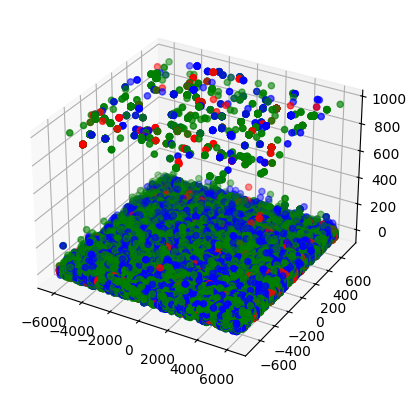

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X0[:, 0], X0[:, 1], X0[:, 2], c=Y_train["color"], marker="o")

In [35]:
plt.show()